In [1]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
%matplotlib inline
# Import dependancies
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from matplotlib import pyplot as plt


# Machine learning on car collision data

In [5]:
# Load the data
file_path = Path('collision_data_ml_auto.csv')
ml_df = pd.read_csv(file_path)
ml_df

,case_id,party_number,victim_number,accident_year,collision_time,day_of_week,weather_1,primary_coll_factor,type_of_collision,at_fault,...,road_cond_1,lighting,point_x,point_y,victim_age,severe_injury,safety_equip_used,victim_sex,victim_seating_postion,victim_ejected
0,90600867,1,1,2017,1955,7,A,A,B,N,...,H,C,-118.280930,34.009389,30,0,GM,M,3,0
1,90600867,1,2,2017,1955,7,A,A,B,N,...,H,C,-118.280930,34.009389,29,0,GM,M,1,0
2,8539423,1,1,2018,2350,6,A,A,C,Y,...,H,C,-118.394562,34.141647,21,0,GL,F,1,0
3,9002091,2,1,2019,630,2,A,A,D,N,...,H,A,-118.518204,34.041370,55,0,GM,M,1,0
4,90798337,2,1,2018,2011,6,A,A,B,N,...,H,D,-118.228332,33.825619,22,0,GL,F,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172347,8292798,1,1,2017,1815,5,A,A,D,Y,...,H,A,-118.428810,34.221670,53,0,GL,M,1,0
172348,8626600,1,1,2018,2200,4,A,A,D,Y,...,C,C,-118.335121,34.010929,32,0,BL,M,1,0
172349,8799235,1,1,2018,815,5,A,A,B,Y,...,H,A,-118.244209,34.032078,31,0,GM,M,1,0
172350,90470136,2,1,2017,1010,6,A,A,C,N,...,H,A,-118.090101,34.072212,25,0,GL,F,1,0


In [6]:
ml_df = ml_df.drop(columns=["case_id", "party_number", "victim_number", 
                            "accident_year", "vehicle_make", "point_x", 
                            "point_y", "stwd_vehicle_type", "oaf_1", 
                            "primary_coll_factor", "party_sex", "at_fault",
                           "victim_age", "victim_sex", "race"])
ml_df
            
                   

,collision_time,day_of_week,weather_1,type_of_collision,party_soberiety,move_pre_acc,vehicle_year,road_surface,road_cond_1,lighting,severe_injury,safety_equip_used,victim_seating_postion,victim_ejected
0,1955,7,A,B,C,B,2012,A,H,C,0,GM,3,0
1,1955,7,A,B,C,B,2012,A,H,C,0,GM,1,0
2,2350,6,A,C,A,B,2012,A,H,C,0,GL,1,0
3,630,2,A,D,A,B,2018,A,H,A,0,GM,1,0
4,2011,6,A,B,A,B,2013,A,H,D,0,GL,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172347,1815,5,A,D,A,B,2012,A,H,A,0,GL,1,0
172348,2200,4,A,D,G,B,2006,A,C,C,0,BL,1,0
172349,815,5,A,B,A,J,2012,A,H,A,0,GM,1,0
172350,1010,6,A,C,A,A,2013,A,H,A,0,GL,1,0


In [7]:
ml_df.dtypes[ml_df.dtypes != 'int64'][ml_df.dtypes != 'float64']

weather_1            object
type_of_collision    object
party_soberiety      object
move_pre_acc         object
road_surface         object
road_cond_1          object
lighting             object
safety_equip_used    object
dtype: object

In [8]:
# Check weather data
ml_df["weather_1"].value_counts()

A    152306
B     15508
C      4233
E       185
G        79
F        27
D        14
Name: weather_1, dtype: int64

A - Clear
B - Cloudy
C - Raining
D - Snowing
E - Fog
F - Other
G - Wind

A - (Vehicle) Code Violation
B - Other Improper Driving

In [8]:
# Check type of collision
ml_df["type_of_collision"].value_counts()

C    67260
D    60381
B    17369
A    14195
E     9565
G     1387
F     1320
H      875
Name: type_of_collision, dtype: int64

A - Head-On
B - Sideswipe
C - Rear End
D - Broadside
E - Hit Object
F - Overturned
G - Vehicle/Pedestrian
H - Other

In [10]:
# Check sobriety factor
ml_df["party_soberiety"].value_counts()

A    158264
B      6170
H      3327
G      2674
C      1548
D       369
Name: party_soberiety, dtype: int64

A - Had not been Drinking
B - Had been Drinking, Under Influence
C - Had been Drinking, Not Under Influence
D - Had been Drinking, Impairment Unknown
G - Impairment Unknown
H - Not Applicable

A - Violation
E - Vision Obscurements
F - Inattention (beginning 1/1/01; see Inattention Item Name near end of record for A-K, P values)
G - Stop and Go Traffic
H - Entering/Leaving Ramp
I - Previous Collision
J - Unfamiliar With Road
K - Defective Vehicle Equipment
L - Uninvolved Vehicle
M - Other
N - None Apparent
O - Runaway Vehicle
P - Inattention, Cell Phone (1/1/01)
Q - Inattention, Electronic Equip.(1/1/01)
R - Inattention, Radio/CD (1/1/01)
S - Inattention, Smoking (1/1/01)
T - Inattention, Eating (1/1/01)
U - Inattention, Children (1/1/01)
V - Inattention, Animal (1/1/01)
W - Inattention, Personal Hygiene (1/1/01)
X - Inattention, Reading (1/1/01)
Y - Inattention, Other (1/1/01)
- - Not Stated

In [11]:
# Check movement pre accident factor
move_pre_acc = ml_df["move_pre_acc"].value_counts()
move_pre_acc

B    86346
A    33118
E    20182
H    11334
R     4446
J     3300
D     2914
M     2801
L     2775
F     1519
C     1373
G      527
N      508
I      384
P      282
Q      269
O      169
K      105
Name: move_pre_acc, dtype: int64

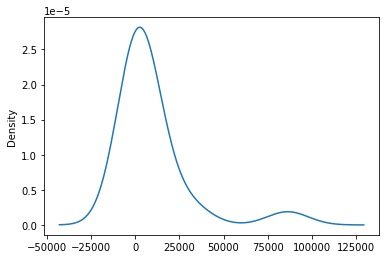

In [12]:
# Visualize the value counts of move_pre_acc
plot = move_pre_acc.plot.density()
fig = plot.get_figure()


A - Stopped
B - Proceeding Straight
C - Ran Off Road
D - Making Right Turn
E - Making Left Turn
F - Making U-Turn
G - Backing
H - Slowing/Stopping
I - Passing Other Vehicle
J - Changing Lanes
K - Parking Maneuver
L - Entering Traffic
M - Other Unsafe Turning
N - Crossed Into Opposing Lane
O - Parked
P - Merging
Q - Traveling Wrong Way
R - Other
- - Not Stated

In [14]:
# Check road type factor
road_surface = ml_df["road_surface"].value_counts()
road_surface

A    163158
B      9079
C        73
D        42
Name: road_surface, dtype: int64

In [16]:
# Determine which values to replace if counts are less than ...?
replace_road_surface = list(road_surface[road_surface < 10000].index)

# Replace in dataframe
for app in replace_road_surface:
    ml_df.road_surface = ml_df.road_surface.replace(app,"slippery")
    
# Check to make sure binning was successful
ml_df.road_surface.value_counts()

A           163158
slippery      9194
Name: road_surface, dtype: int64

A - Dry
B - Wet
C - Snowy or Icy
D - Slippery (Muddy, Oily, etc.)

In [17]:
# Check road conditions factor
ml_df["road_cond_1"].value_counts()

H    168956
D      2185
G       366
C       361
A       266
F        80
E        70
B        68
Name: road_cond_1, dtype: int64

	
A - Holes, Deep Ruts
B - Loose Material on Roadway
C - Obstruction on Roadway
D - Construction or Repair Zone
E - Reduced Roadway Width
F - Flooded
G - Other
H - No Unusual Condition

In [20]:
# Check lighting conditions factor
ml_df["lighting"].value_counts()

A    117235
C     42915
D      6547
B      5383
E       272
Name: lighting, dtype: int64

	
A - Daylight
B - Dusk - Dawn
C - Dark - Street Lights
D - Dark - No Street Lights
E - Dark - Street Lights Not 

In [21]:
# Check safety equipment used conditions factor
pd.set_option('display.max_rows', 120)
ml_df["safety_equip_used"].value_counts()

GM    90031
GL    62324
GP     5722
MQ     3286
PQ     1378
HL     1137
LQ     1102
BL      862
HM      824
BM      695
CM      693
CL      613
LM      385
EM      353
EL      334
GN      241
HP      224
BG      149
MP      135
PW      108
CP      106
FM       97
FL       92
BP       89
DL       65
MU       65
AL       58
GQ       57
LP       55
DM       54
AM       52
PU       50
JM       44
MT       40
NY       40
GY       38
LY       37
MN       37
LU       37
MY       36
BB       36
AP       35
LN       34
MR       32
MS       27
NQ       26
BN       26
LR       26
PR       25
PP       25
LT       22
LS       21
EP       20
PT       20
PS       18
GH       16
JL       13
AG       13
DP       13
MW       12
CG       12
GW        9
AB        9
CN        9
FP        9
GU        6
HN        6
PV        6
BH        5
KL        4
JP        4
GK        4
BQ        4
EN        4
CY        3
MV        3
AN        3
FG        3
BC        2
FQ        2
MX        2
LW        2
EQ        2
DN  

A - None in Vehicle
B - Unknown
C - Lap Belt Used
D - Lap Belt Not Used
E - Shoulder Harness Used
F - Shoulder Harness Not Used
G - Lap/Shoulder Harness Used
H - Lap/Shoulder Harness Not Used
J - Passive Restraint Used
K - Passive Restraint Not Used
L - Air Bag Deployed
M - Air Bag Not Deployed
N - Other
P - Not Required
Q - Child Restraint in Vehicle Used
R - Child Restraint in Vehicle Not Used
S - Child Restraint in Vehicle, Use Unknown
T - Child Restraint in Vehicle, Improper Use
U - No Child Restraint in Vehicle
V - Driver, Motorcycle Helmet Not Used
W - Driver, Motorcycle Helmet Used
X - Passenger, Motorcycle Helmet Not Used
Y - Passenger, Motorcycle Helmet Used
- or blank - Not Stated AX  Z ˛z

In [23]:
# Convert strings to numeric values
from sklearn.preprocessing import LabelEncoder
ml_encoded = pd.get_dummies(ml_df, columns=["weather_1", "type_of_collision", 
                                            "party_soberiety", "move_pre_acc", 
                                             "road_surface", "road_cond_1", 
                                            "lighting", "safety_equip_used", ])
ml_encoded.head()

,collision_time,day_of_week,vehicle_year,severe_injury,victim_seating_postion,victim_ejected,weather_1_A,weather_1_B,weather_1_C,weather_1_D,...,safety_equip_used_PQ,safety_equip_used_PR,safety_equip_used_PS,safety_equip_used_PT,safety_equip_used_PU,safety_equip_used_PV,safety_equip_used_PW,safety_equip_used_PY,safety_equip_used_QR,safety_equip_used_QY
0,1955,7,2012,0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1955,7,2012,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2350,6,2012,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,630,2,2018,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2011,6,2013,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Create our features
X = ml_encoded.copy()
X = X.drop(columns="severe_injury")
X.head()

# Create our target
y = ml_encoded["severe_injury"]

In [25]:
# Check the balance of our target values
y.value_counts()

0    168410
1      3942
Name: severe_injury, dtype: int64

In [26]:
# Create training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Determine the shape of our training and testing sets.
print(f"Training Set", Counter(y_train))
print(f"Testing Set", Counter(y_test))

Training Set Counter({0: 126321, 1: 2943})
Testing Set Counter({0: 42089, 1: 999})


In [27]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({0: 126321, 1: 126321})

In [28]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [29]:
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Testing Score: {model.score(X_test, y_test)}')

Training Score: 0.785740809506127
Testing Score: 0.7881080579279613


In [30]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.7503279135059411

In [31]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(
    cm, index=["Actual Minor/No Injuries", "Actual Severe/Fatality"], columns=["Predicted Minor/No Injuries", "PredictedSevere/Fatality"])

cm_df

,Predicted Minor/No Injuries,PredictedSevere/Fatality
Actual Minor/No Injuries,33248,8841
Actual Severe/Fatality,289,710


In [32]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy='auto').fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({0: 126321, 1: 126321})

In [33]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [34]:
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Testing Score: {model.score(X_test, y_test)}')

Training Score: 0.903027911870281
Testing Score: 0.9031748978834014


In [35]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.678765129738068

In [36]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual Minor/No Injuries", "Actual Severe/Fatality"], columns=["Predicted Minor/No Injuries", "PredictedSevere/Fatality"])

cm_df

,Predicted Minor/No Injuries,PredictedSevere/Fatality
Actual Minor/No Injuries,38473,3616
Actual Severe/Fatality,556,443


In [37]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.91      0.44      0.95      0.64      0.42     42089
          1       0.11      0.44      0.91      0.18      0.64      0.39       999

avg / total       0.97      0.90      0.45      0.93      0.64      0.42     43088



In [38]:
# Resample the training data with SMOTEENN
# Warning: This is a large dataset, and this step may take some time to complete
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({0: 103515, 1: 125071})

In [39]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [40]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.7011152971498905

In [41]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual Minor/No Injuries", "Actual Severe/Fatality"], 
    columns=["Predicted High Risk", "Predicted Low Risk"])

cm_df

,Predicted High Risk,Predicted Low Risk
Actual High Risk,37658,4431
Actual Low Risk,492,507


In [42]:
# Print the imbalanced classification report
print( classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.89      0.51      0.94      0.67      0.47     42089
          1       0.10      0.51      0.89      0.17      0.67      0.44       999

avg / total       0.97      0.89      0.52      0.92      0.67      0.47     43088



In [43]:
# Imported sklearn and imblearn dependancies
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn import datasets

In [44]:
# Create training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Creating a StandardScaler instance and fit with the training data.
scaler = StandardScaler().fit(X_train)
# Scale the X data
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(129264, 168)
(43088, 168)
(129264,)
(43088,)


In [45]:
# Resample the training data with the BalancedRandomForestClassifier
brf_model = BalancedRandomForestClassifier(n_estimators = 100, random_state=1)

# Fitting the model
brf_model = brf_model.fit(X_train_scaler, y_train)

# View accuracy of models
print(f'Training Score: {brf_model.score(X_train_scaler, y_train)}')
print(f'Testing Score: {brf_model.score(X_test_scaler, y_test)}')

# Make Prediction
predictions = brf_model.predict(X_test_scaler)

Training Score: 0.7675454883030078
Testing Score: 0.7623700334199777


In [46]:
# Calculated the balanced accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

0.7623700334199777

In [48]:
# Display the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Minor/No Injuries", "Actual Severe/Fatality"], 
    columns=["Predicted Minor/No Injuries", "Predicted Severe/Fatality"])
cm_df


,Predicted Minor/No Injuries,Predicted Severe/Fatality
Actual Minor/No Injuries,32064,10025
Actual Severe/Fatality,214,785


In [49]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.76      0.79      0.86      0.77      0.60     42089
          1       0.07      0.79      0.76      0.13      0.77      0.60       999

avg / total       0.97      0.76      0.79      0.85      0.77      0.60     43088



In [50]:
# List the features sorted in descending order by feature importance
importances = brf_model.feature_importances_


In [60]:
# Rank feature importances and display results

ranked_importances = sorted(zip(brf_model.feature_importances_, ml_encoded.columns), reverse=True)
ranked_importances

[(0.2068916562690477, 'collision_time'),
 (0.1432113911424359, 'vehicle_year'),
 (0.08517442523293275, 'day_of_week'),
 (0.06873307353487032, 'safety_equip_used_GL'),
 (0.04519701277073657, 'severe_injury'),
 (0.04305250274168358, 'type_of_collision_H'),
 (0.02995078706033371, 'type_of_collision_D'),
 (0.02971890883823271, 'safety_equip_used_GK'),
 (0.02300098558122704, 'road_cond_1_H'),
 (0.02244364982891581, 'party_soberiety_D'),
 (0.017829989732544994, 'type_of_collision_B'),
 (0.01761041722104567, 'party_soberiety_A'),
 (0.015427364407364204, 'move_pre_acc_A'),
 (0.01501252753087362, 'safety_equip_used_GY'),
 (0.013854726433928372, 'party_soberiety_H'),
 (0.013392509956405507, 'type_of_collision_C'),
 (0.012956405851616275, 'lighting_B'),
 (0.011462430085871136, 'weather_1_G'),
 (0.01020596792262132, 'victim_seating_postion'),
 (0.00959722209455348, 'move_pre_acc_Q'),
 (0.009574547464559505, 'move_pre_acc_D'),
 (0.009422038924337848, 'type_of_collision_A'),
 (0.00904889898693021, '

In [64]:
# Create dataframe containing ranked and sorted feature importances
ranked_importances_df = pd.DataFrame(sorted(ranked_importances, reverse=True), columns=["Importance", "Feature"])
ranked_importances_df

,Importance,Feature
0,0.206892,collision_time
1,0.143211,vehicle_year
2,0.085174,day_of_week
3,0.068733,safety_equip_used_GL
4,0.045197,severe_injury
...,...,...
163,0.000000,safety_equip_used_EQ
164,0.000000,safety_equip_used_DP
165,0.000000,safety_equip_used_BQ
166,0.000000,safety_equip_used_BB


<Figure size 1440x720 with 0 Axes>

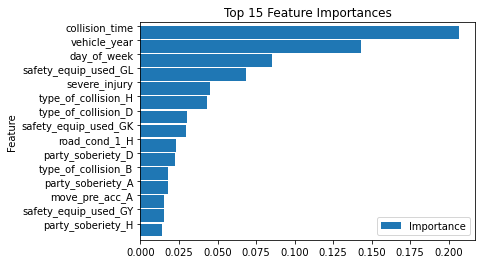

In [67]:
# Visualize top 10 feature importances
top_importances_df = ranked_importances_df.head(15)

plt.figure(figsize=(20,10))
top_importances_df.plot.barh(x="Feature", y="Importance", align='edge', width=0.9,
                      title="Top 15 Feature Importances",
                           ylabel="% Importance")
plt.gca().invert_yaxis()
plt.show
plt.savefig('topfeatureranking.png')


In [54]:
# Show count of total estimators in Balanced Random Forest Classifier
print(len(brf_model.estimators_))

100


In [55]:
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier
eec = EasyEnsembleClassifier(n_estimators=100, random_state=1)
eec.fit(X_train_scaler, y_train)

# View accuracy of models
print(f'Training Score: {eec.score(X_train_scaler, y_train)}')
print(f'Testing Score: {eec.score(X_test_scaler, y_test)}')


predictions = eec.predict(X_test_scaler)

Training Score: 0.7894154598341379
Testing Score: 0.7925640549572966


In [56]:
# Calculated the balanced accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

0.7925640549572966

In [57]:
# Display the confusion matrix
y_pred = eec.predict(X_test_scaler)
cm = confusion_matrix(y_test, y_pred)

In [61]:
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Minor/No Injuries", "Actual Severe/Fatality"], 
    columns=["Predicted Minor/No Injuries", "Predicted Severe/Fatality"])
cm_df


,Predicted Minor/No Injuries,Predicted Severe/Fatality
Actual Minor/No Injuries,33402,8687
Actual Severe/Fatality,251,748


In [59]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.79      0.75      0.88      0.77      0.60     42089
          1       0.08      0.75      0.79      0.14      0.77      0.59       999

avg / total       0.97      0.79      0.75      0.86      0.77      0.60     43088

